# Caratterizzazione delle immagini

In [1]:
# Librerie
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io

In [2]:
# Import immagine
x = io.imread("dorian.jpg")

# Dimensione delle immagini
(M,N) = x.shape

# Media
xmed = np.mean(x)

# Deviazione standard
xstd = np.std(x)

# Varianza
variance = np.var(x)

Calcolo della media mediante una maschera 3x3

Tempo d'esecuzione:  0.3212296962738037  s


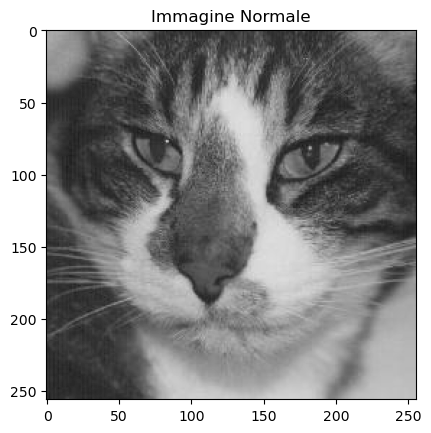

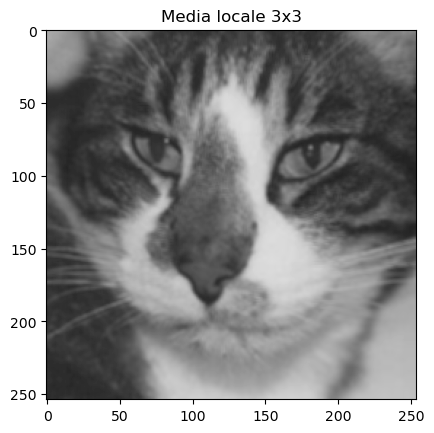

In [6]:
from time import time
tic = time()

MED = np.zeros((M-2,N-2))

for i in range(M-2):
    for j in range(N-2):
        MED[i,j] = np.mean(x[i:i+3,j:j+3])

plt.figure()
plt.imshow(x, clim=[0,255],cmap="gray")
plt.title("Immagine Normale")

plt.figure()
plt.imshow(MED, clim=[0,255], cmap="gray")
plt.title("Media locale 3x3")

toc = time()
print("Tempo d'esecuzione: ",toc-tic," s")

Posso utilizzare anche delle funzioni preconfigurate per il calcolo delle statistiche locali di un immagine. Precisamente tali funzioni sono dette generic-filter

Tempo d'esecuzione:  0.2701609134674072  s


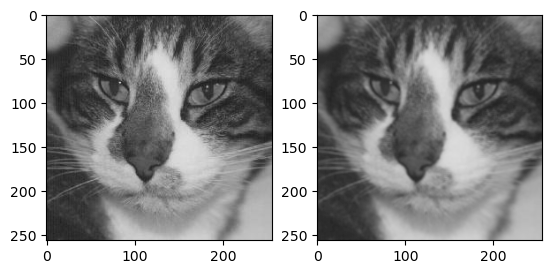

In [8]:
tic = time()

y = ndi.generic_filter(x, np.mean, (3,3))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0, 255], cmap="gray")

toc = time()
print("Tempo d'esecuzione: ", toc - tic, " s")

Per visualizzare l'istogramma delle occorrenze dei livelli di grigio, si avrà:

(0.0, 255.0, 0.0, 948.2)

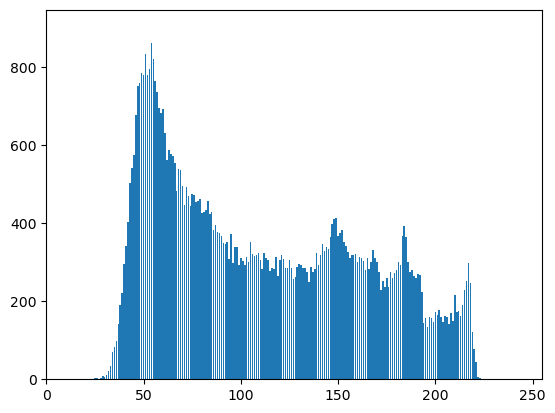

In [20]:
n, b = np.histogram(x, np.arange(257))
plt.figure()
plt.bar(np.arange(256), n)
plt.axis([0,255,0,1.1*np.max(n)])